In [4]:
import math, time
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open("data.txt", "r") as file:
    contents = np.array(file.readlines())

In [6]:
x_train = np.zeros(contents.shape[0])
y_train = np.zeros(contents.shape[0])

for index, str_data in enumerate(contents):
    data = str_data.removesuffix("\n").split(",")
    x_train[index] = int(data[0])
    y_train[index] = np.round(int(data[2]) / 1000)

In [7]:
print(x_train)
print(y_train)

[2104. 1600. 2400. 1416. 3000. 1985. 1534. 1427. 1380. 1494. 1940. 2000.
 1890. 4478. 1268. 2300. 1320. 1236. 2609. 3031. 1767. 1888. 1604. 1962.
 3890. 1100. 1458. 2526. 2200. 2637. 1839. 1000. 2040. 3137. 1811. 1437.
 1239. 2132. 4215. 2162. 1664. 2238. 2567. 1200.  852. 1852. 1203.]
[400. 330. 369. 232. 540. 300. 315. 199. 212. 242. 240. 347. 330. 700.
 260. 450. 300. 200. 500. 599. 253. 255. 243. 260. 574. 250. 464. 469.
 475. 300. 350. 170. 315. 580. 286. 250. 230. 345. 549. 287. 368. 330.
 314. 299. 180. 300. 240.]


In [8]:
def linear_regression_model(x, w, b):
    return (w * x) + b

In [9]:
def cost_function(x_set, y_set, w, b):
    m = x_set.shape[0]

    error = np.subtract(linear_regression_model(x_set, w, b), y_set)
    squared_error = np.square(error)
    total_cost = (1/(2*m)) * np.sum(squared_error)
    normalized_cost = total_cost / (2 * m)

    return normalized_cost

In [10]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [11]:
def plot_training_set(x_set, y_set, plot_now = True):
    tr_plot = plt.subplot(111)

    tr_plot.scatter(x_set, y_set, marker = "x", color = "r")
    tr_plot.set_xlabel("$x (sq. ft.)$")
    tr_plot.set_ylabel("$y (1000\$)$")
    tr_plot.set_title("Training Set")

    if plot_now:
        plt.show()

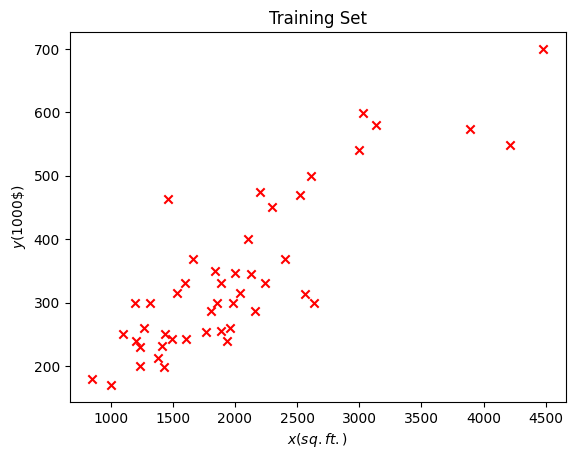

In [12]:
plot_training_set(x_train, y_train)

In [13]:
def compute_gradient(x_set, y_set, w, b):
    m = x_set.shape[0]

    error_terms = np.subtract(linear_regression_model(x_set, w, b), y_set)
    dj_dw = np.sum(error_terms * x_set) / m
    dj_db = np.sum(error_terms) / m

    return dj_dw, dj_db

In [14]:
def compute_gradient_2(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [150]:
initial_w = 0.13450035128541113
initial_b = 71.36453123234195

learning_rate = 0.0000001
num_iters = 1000000

In [151]:
def gradient_descent(x_set, y_set, alpha, w = 0, b = 0):
    cost_values = [cost_function(x_set, y_set, w, b)]

    dj_dw, dj_db = compute_gradient(x_set, y_set, w, b)

    num_iters = 0
    while abs(dj_dw) > 1e-02 or abs(dj_db) > 1e-02:
        dj_dw, dj_db = compute_gradient(x_set, y_set, w, b)

        if (num_iters+1) % 1000000 == 0:
            cost_values.append(cost_function(x_set, y_set, w, b))
        
        if (num_iters+1) % 100000 == 0 or num_iters == 0:
            print(f"Iteration: {num_iters+1}\tw: {w: 0.3e}\tb: {b: 0.3e}\tCost: {cost_values[-1]: 0.1e}\td_dw: {dj_dw: 0.3e}\td_db: {dj_db: 0.3e}")

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        num_iters += 1

    return w, b, cost_values, num_iters

In [152]:
def gradient_descent_2(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i < 100000:
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [153]:
gradient_descent(x_train, y_train, learning_rate, w = initial_w, b = initial_b)

Iteration: 1	w:  1.134e-01	b:  1.201e+02	Cost:  2.4e+01	d_dw:  2.805e+00	d_db:  6.530e+00
Iteration: 100000	w:  1.134e-01	b:  1.200e+02	Cost:  2.4e+01	d_dw: -2.823e-03	d_db:  6.520e+00
Iteration: 200000	w:  1.135e-01	b:  1.200e+02	Cost:  2.4e+01	d_dw: -2.819e-03	d_db:  6.512e+00
Iteration: 300000	w:  1.135e-01	b:  1.199e+02	Cost:  2.4e+01	d_dw: -2.816e-03	d_db:  6.503e+00
Iteration: 400000	w:  1.135e-01	b:  1.198e+02	Cost:  2.4e+01	d_dw: -2.812e-03	d_db:  6.494e+00
Iteration: 500000	w:  1.135e-01	b:  1.198e+02	Cost:  2.4e+01	d_dw: -2.808e-03	d_db:  6.486e+00
Iteration: 600000	w:  1.136e-01	b:  1.197e+02	Cost:  2.4e+01	d_dw: -2.804e-03	d_db:  6.477e+00
Iteration: 700000	w:  1.136e-01	b:  1.196e+02	Cost:  2.4e+01	d_dw: -2.801e-03	d_db:  6.468e+00
Iteration: 800000	w:  1.136e-01	b:  1.196e+02	Cost:  2.4e+01	d_dw: -2.797e-03	d_db:  6.460e+00
Iteration: 900000	w:  1.137e-01	b:  1.195e+02	Cost:  2.4e+01	d_dw: -2.793e-03	d_db:  6.451e+00
Iteration: 1000000	w:  1.137e-01	b:  1.195e+02	Cost:  2

(0.13450035128541113,
 71.36453123234195,
 [23.56197025592576,
  23.51722023167001,
  23.473651512119513,
  23.431232947747613,
  23.389934176015778,
  23.349725635914968,
  23.310578546807253,
  23.272464887823975,
  23.235357377809724,
  23.199229455794775,
  23.164055261982746,
  23.129809619241016,
  23.09646801507906,
  23.06400658410312,
  23.032402090933303,
  23.001631913572215,
  22.971674027213005,
  22.942506988473077,
  22.914109920046663,
  22.88646249576059,
  22.859544926025016,
  22.8333379436683,
  22.807822790146286,
  22.782981202114875,
  22.758795398357627,
  22.735248067058066,
  22.71232235340787,
  22.690001847543428,
  22.668270572798722,
  22.64711297427049,
  22.626513907683666,
  22.60645862855167,
  22.58693278162225,
  22.567922390602103,
  22.549413848154007,
  22.531393906155216,
  22.513849666215737,
  22.49676857044556,
  22.48013839246597,
  22.463947228658068,
  22.448183489642485,
  22.432835891983544,
  22.41789345011328,
  22.403345468467617,
  22

In [88]:
gradient_descent_2(x_train, y_train, initial_w, initial_b, learning_rate, num_iters, cost_function, compute_gradient)

Iteration    0: Cost 2.20e+02  dj_dw: -7.643e+05, dj_db: -3.404e+02   w:  7.643e-02, b: 3.40447e-05


KeyboardInterrupt: 

In [20]:
start = time.time()
for i in range(num_iters):
    cost_function(x_train, y_train, initial_w, initial_b)
end = time.time()
print(f"My Algo: {end - start}")

start = time.time()
for i in range(num_iters):
    compute_cost(x_train, y_train, initial_w, initial_b)
end = time.time()
print(f"DeepLearning.AI Algo: {end - start}")

My Algo: 5.77485990524292
DeepLearning.AI Algo: 18.145791053771973


In [168]:
def visualize_cost(x_train, y_train):
    fig = plt.figure(figsize = (8, 8))
    transparent_color = (1.0, 1.0, 1.0, 0.0)

    # Adding a SubPlot - sp2
    sp2 = fig.add_subplot(projection = '3d')

    # Sets the axes' background color to transparent
    sp2.xaxis.set_pane_color(transparent_color)
    sp2.yaxis.set_pane_color(transparent_color)
    sp2.zaxis.set_pane_color(transparent_color)

    # Setting the viweing angle
    sp2.zaxis.set_rotate_label(False)
    sp2.view_init(60, -120)

    scale_factor = 100
    ratio = 71.36453123234195 / 0.13450035128541113

    # Evenly spaces out the values of w and b across (-20, 20) in 100 divisions
    w = np.linspace(0.13450035128541113 - scale_factor, 0.13450035128541113 + scale_factor, 100)
    b = np.linspace(71.36453123234195 - ratio * scale_factor, 71.36453123234195 + ratio * scale_factor, 100)

    # Get the z value for a bowl-shaped cost function
    J_wb = np.zeros((w.shape[0], b.shape[0]))
    for i, x in enumerate(w):
        for j, y in enumerate(b):
            J_wb[i,j] = compute_cost(x_train, y_train, x, y)

    # Meshgrid used for plotting 3D functions
    '''
    Purpose -
    - Sets the output parameters as 2D arrays of points (initially they were 1D)
    - Takes an array like [0.  0.5 1. ] and [0.  1. ] and converts it into [[0.  0.5 1. ], [0.  0.5 1. ]] (fixes horizontally and multiplies vertically) and [[0.  0.  0. ], [1.  1.  1. ]] (fixes vertically and multiplies horizontally)
    '''
    W, B = np.meshgrid(w, b)

    # Create the 3D surface plot of the bowl-shaped cost function
    '''
    Properties -
    : cmap : Sets the color of the map to be plain, coloured (Spectral is similar to terrain classification), etc.
    : alpha : Sets the opacity of the surface
    : antialiased : Makes the surface appear smooth when turned on (Not pixelated/jagged)
    '''
    sp2.plot_surface(W, B, J_wb, cmap = "Spectral_r", alpha = 0.7, antialiased = True)

    # Makes the wireframe over the surface (highlights the mesh)
    '''
    Properties -
    : color : Sets the color of the wireframe ('k' as black)
    : alpha : Sets the opacity of the wireframe
    '''
    sp2.plot_wireframe(W, B, J_wb, color = 'k', alpha = 0.1)

    # Setting axes' labels amd titles
    sp2.set_xlabel("$w$")
    sp2.set_ylabel("$b$")
    sp2.set_zlabel("$J(w,b)$", rotation=90) # Rotation specifies text being rotated to vertical position
    sp2.set_title("$J(w,b)$", size=15)

    plt.show()

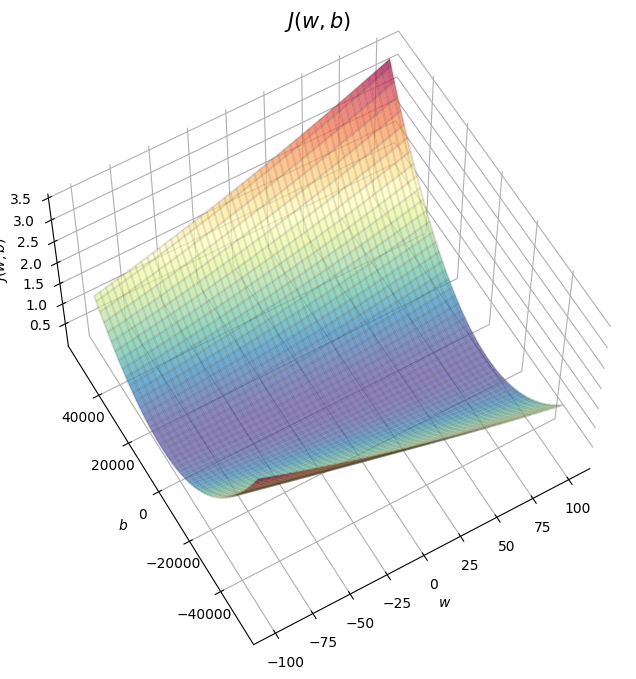

In [169]:
visualize_cost(x_train, y_train)